In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


Saving covid-19outbreaksbymonth_03jun25 (2).csv to covid-19outbreaksbymonth_03jun25 (2).csv


In [ ]:
for filename in uploaded.keys():
    df = pd.read_csv(filename)
    print("Loaded:", filename)

df.head()


Loaded: covid-19outbreaksbymonth_03jun25 (2).csv


,MonthYear,IndustrySector,IndividualSetting,IndCode,Outbreaks,Cases
0,Before Jan 2021,Accommodation and Food Services,"Recreational vehicle parks and camps, and room...",8670,2,2
1,Before Jan 2021,Accommodation and Food Services,Restaurants and other food services,8680,275,1849
2,Before Jan 2021,Accommodation and Food Services,Traveler accommodation,8660,36,298
3,Before Jan 2021,Administrative and support and waste managemen...,Business support services,7590,4,30
4,Before Jan 2021,Administrative and support and waste managemen...,Employment services,7580,5,24


In [ ]:
def convert_monthyear(val):
    val = str(val).strip()

    # date format
    try:
        return pd.to_datetime(val, format="%b-%y")
    except:
        pass

    # change "Before Jan 2021"
    if "Before" in val:
        month = val.replace("Before", "").strip()   # "Jan 2021"
        parsed = pd.to_datetime(month, format="%b %Y")
        return parsed - pd.DateOffset(months=1)

    # Fallback
    return pd.NaT


df["Date"] = df["MonthYear"].apply(convert_monthyear)

# Drop rows
df = df.dropna(subset=["Date"])
df = df.sort_values("Date").reset_index(drop=True)

df[["MonthYear", "Date"]].head(10)


,MonthYear,Date
0,Before Jan 2021,2020-12-01
1,Before Jan 2021,2020-12-01
2,Before Jan 2021,2020-12-01
3,Before Jan 2021,2020-12-01
4,Before Jan 2021,2020-12-01
5,Before Jan 2021,2020-12-01
6,Before Jan 2021,2020-12-01
7,Before Jan 2021,2020-12-01
8,Before Jan 2021,2020-12-01
9,Before Jan 2021,2020-12-01


In [ ]:
target = "Cases"
y = df[target]


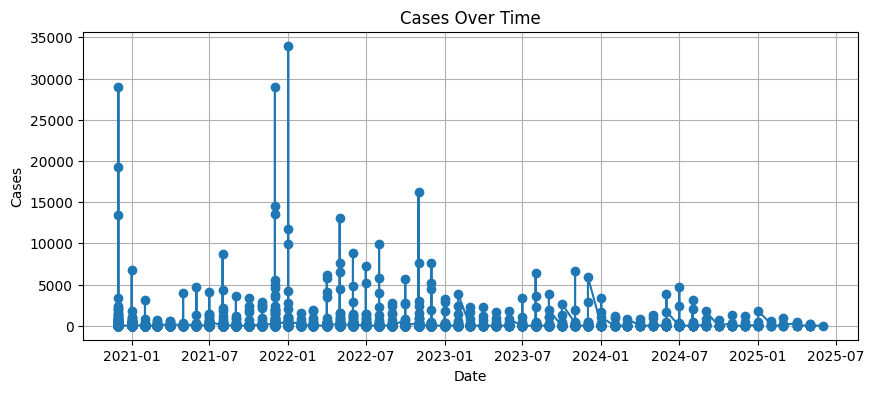

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df["Date"], y, marker="o")
plt.title(f"{target} Over Time")
plt.xlabel("Date")
plt.ylabel(target)
plt.grid(True)
plt.show()
